In [1]:
#Created on Saturday May 14, 2022 
#author: Kayla Brock

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np 
import matplotlib.pyplot as plt 
import math
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings("ignore")
import acquire
import seaborn as sns 
import pydataset as p
import os

In [3]:
df = acquire.get_telco_data()

Using cached csv


In [4]:
df.to_csv("eTelcoData.csv", index=False)

### Step 1 

### Summarize Data

In [5]:
#High level overvue
#DataFrame contains int, float, boolean, and string values
df.head(3)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


In [6]:
#Mean monthly charge 64 dollars 
#Min Charge is 18.25
#Max Charge is 118.75
#no outliers
df.monthly_charges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64

In [7]:
#dummy chart in place of where I want a chart 


In [8]:
#mean 2283 
#min 18.80
#max 8684.80 
#no outliers
df.total_charges.describe()

count     7043
unique    6531
top           
freq        11
Name: total_charges, dtype: object

In [10]:
#dummy chart


In [11]:
#AAAAAAAA*********Need a way to confirm tenure is in 'months'
#Mean tenure 32 months 
#Min tenure 0 months 
#Max tenure 72 months 
#no outliers
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [13]:
#dummy chart


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [15]:
df.isnull().sum()

payment_type_id             0
contract_type_id            0
internet_service_type_id    0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
internet_service_type       0
contract_type               0
payment_type                0
dtype: int64

In [16]:
df.value_counts().sum()

7043

In [17]:
df.shape

(7043, 24)

### Checking for outliers

In [18]:
df.columns

Index(['payment_type_id', 'contract_type_id', 'internet_service_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'contract_type',
       'payment_type'],
      dtype='object')

Payment Types: 
    1. Electronic check 
    2. Mailed Check 
    3. Bank Transfer (automatic)
    4. Credit Card (automatic )

In [19]:
#Four types of payment offered at Telco
df['payment_type_id'].value_counts()

1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64

In [20]:
#Duplicate column: put key of corresponding values above payment_type_id 
#Consider dropping column 
df['payment_type'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

Contract Types Key: 1. Month-to-Month.   2. One Year    3. Two Year

In [21]:
df['contract_type_id'].value_counts()

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

In [22]:
#Duplicate column consider dropping before ML
df['contract_type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

Internet Service Type Key: 1. DSL 2. Fiber Optic  3. No Internet Service at this time

In [23]:
df['internet_service_type_id'].value_counts()

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64

In [24]:
#key written above internet service type id
#consider dropping column before machine learning 
df['internet_service_type'].value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [25]:
#unique identifier 
#consider dropping column 
#no outliers 
df['customer_id'].value_counts()

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64

In [26]:
#Two Genders
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [27]:
#Total of 1142 senior citizen customers 
df['senior_citizen'].value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [28]:
#what does this even actually mean? 
df['partner'].value_counts()

No     3641
Yes    3402
Name: partner, dtype: int64

In [29]:
#over 2k customers with dependents, what does this mean? do their kids have phones? 
df['dependents'].value_counts()

No     4933
Yes    2110
Name: dependents, dtype: int64

In [30]:
#The two greatest subsets of tenure are those who have been with telco for one year and those that have been with 
#telco 6 years. I think it is important to investigate the demographics of the customers who have been with telco the 
#longest period of time 
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
70    119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
56     80
52     80
64     80
25     79
26     79
14     76
65     76
61     76
60     76
46     74
19     73
27     72
29     72
30     72
63     72
20     71
53     70
62     70
41     70
32     69
50     68
54     68
47     68
51     68
58     67
49     66
31     65
43     65
42     65
34     65
57     65
37     65
40     64
48     64
33     64
55     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: tenure, dtype: int64

In [31]:
df['phone_service'].value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [32]:
df['multiple_lines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

In [33]:
df['online_security'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

In [34]:
df['online_backup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

In [35]:
df['device_protection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

In [36]:
df['tech_support'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

In [37]:
df['streaming_tv'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64

In [38]:
df['streaming_movies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64

In [39]:
df['paperless_billing'].value_counts()

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

In [40]:
df['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

### Step 2

### Clean the Data

In [41]:
#Drop duplicates 
df = df.drop_duplicates()
df.shape

(7043, 24)

In [42]:
df.shape

(7043, 24)

In [43]:
#drop all duplicate columns 
cols_to_drop = ['customer_id', 'payment_type_id', 'internet_service_type_id', 'contract_type_id']
df = df.drop(columns=cols_to_drop)

In [44]:
df.isnull().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
internet_service_type    0
contract_type            0
payment_type             0
dtype: int64

In [45]:
#Drop null values stored as whitespace
df['total_charges'] = df['total_charges'].str.strip()
df = df[df.total_charges != '']

In [46]:
#validate no nulls in dataset 
df.isnull().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
internet_service_type    0
contract_type            0
payment_type             0
dtype: int64

In [47]:
#change total_charges to float type 
df['total_charges'] = df.total_charges.astype(float)

#Convert binary categorical variables to numeric 

In [48]:

df['is_female'] = df.gender.map({'Female': 1, 'Male': 0})

In [49]:
df['has_partner'] = df.partner.map({'Yes': 1, 'No':0})

In [50]:
df['has_dependents'] = df.dependents.map({'Yes': 1, 'No':0})

In [51]:
df['has_phone_svc'] = df.phone_service.map({'Yes': 1, 'No':0})

In [52]:
df['has_paperless_bill'] = df.paperless_billing.map({'Yes': 1, 'No':0})

In [53]:
df['has_churned'] = df.churn.map({'Yes': 1, 'No':0})

#get dummies for non-binary categorical variables 

In [54]:
 dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    

#concatenate dummy dataframe to original 

In [55]:
df = pd.concat([df, dummy_df], axis=1)

### Split the data 

In [56]:
def split_telco_data(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.churn)
    return train, validate, test

In [57]:
train, validate, test = split_telco_data(df)

In [58]:
train.shape

(3937, 47)

In [59]:
validate.shape

(1688, 47)

In [60]:
test.shape

(1407, 47)

### Explore the Data

In [61]:
#examine the characteristics of customers who have been with the company for 72 months 

In [106]:
tenure_bins = pd.cut(train.tenure, 10, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

In [107]:
tenure_bins.value_counts()

a    975
j    635
b    396
d    292
h    291
c    289
i    283
e    269
g    260
f    247
Name: tenure, dtype: int64

SyntaxError: invalid syntax (3804412919.py, line 1)

In [62]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'internet_service_type', 'contract_type', 'payment_type', 'is_female',
       'has_partner', 'has_dependents', 'has_phone_svc', 'has_paperless_bill',
       'has_churned', 'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_One year', 'contract_type_Two year',


In [63]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,71.10,4299.20,No,DSL,One year,Credit card (automatic),1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,No,No,No,Yes,85.45,6028.95,No,Fiber optic,One year,Credit card (automatic),0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,25.75,882.55,No,None,Month-to-month,Electronic check,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.20,19.20,No,None,Month-to-month,Mailed check,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,Yes,No,No,No,54.00,1055.90,No,DSL,One year,Mailed check,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [64]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.161290,32.775210,64.805131,2316.775641,0.498095,0.485141,0.302769,0.905258,0.590297,0.265685,0.094742,0.423927,0.220218,0.292609,0.220218,0.348743,0.220218,0.349759,0.220218,0.289307,0.220218,0.386335,0.220218,0.391415,0.207010,0.243078,0.437389,0.220218,0.227330,0.327407,0.226314
std,0.367845,24.709604,30.294804,2284.984394,0.500060,0.499843,0.459514,0.292896,0.491841,0.441753,0.292896,0.494242,0.414447,0.455018,0.414447,0.476633,0.414447,0.476954,0.414447,0.453498,0.414447,0.486971,0.414447,0.488129,0.405215,0.428997,0.496127,0.414447,0.419161,0.469327,0.418498
min,0.000000,1.000000,18.250000,18.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,34.700000,396.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,30.000000,70.250000,1414.800000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,90.300000,3893.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.650000,8594.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

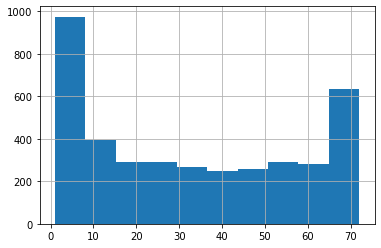

In [78]:
train['tenure'].hist()

In [84]:
greater_than_sixty = df['tenure'] >= 60

In [86]:
loyal_customers = df[greater_than_sixty]
loyal_customers

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,is_female,has_partner,has_dependents,has_phone_svc,has_paperless_bill,has_churned,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6,Female,1,Yes,No,71,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,109.70,7904.25,No,Fiber optic,Two year,Bank transfer (automatic),1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0
7,Male,0,Yes,No,63,Yes,Yes,Yes,No,No,Yes,No,No,Yes,84.65,5377.80,No,Fiber optic,Two year,Credit card (automatic),0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0
9,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,No,DSL,Two year,Mailed check,1,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1
11,Female,0,Yes,Yes,72,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,116.80,8456.75,No,Fiber optic,Two year,Credit card (automatic),1,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0
13,Female,0,No,No,72,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,101.30,7261.25,No,Fiber optic,Two year,Bank transfer (automatic),1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,Male,0,No,No,63,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,68.80,4111.35,No,DSL,One year,Bank transfer (automatic),0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
7028,Female,0,Yes,Yes,67,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.25,1372.90,No,None,Two year,Bank transfer (automatic),1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
7031,Male,0,No,Yes,64,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,99.15,6171.20,No,Fiber optic,Month-to-month,Credit card (automatic),0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,DSL,Two year,Mailed check,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1


<AxesSubplot:>

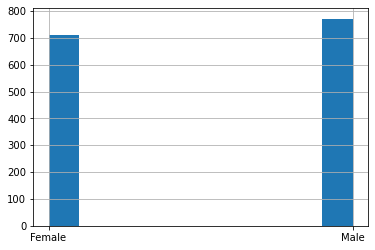

In [94]:
loyal_customers['gender'].hist()

<AxesSubplot:>

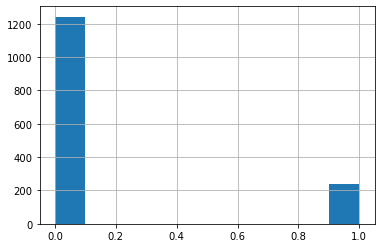

In [88]:
loyal_customers['senior_citizen'].hist()

<AxesSubplot:>

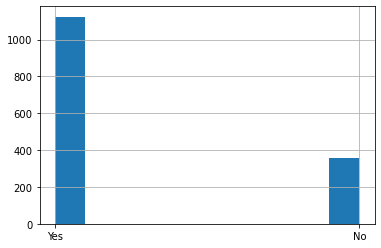

In [89]:
loyal_customers['partner'].hist()

<AxesSubplot:>

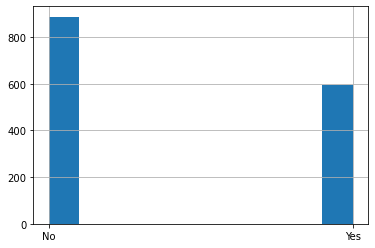

In [90]:
loyal_customers['dependents'].hist()

<AxesSubplot:>

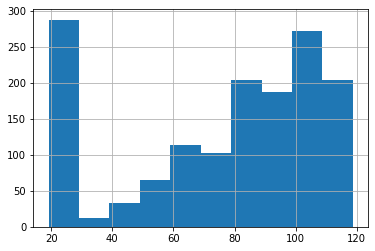

In [91]:
loyal_customers['monthly_charges'].hist()

<AxesSubplot:>

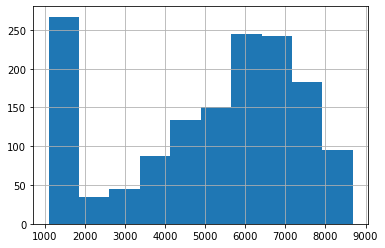

In [92]:
loyal_customers['total_charges'].hist()